# <p style="font-family: fantasy; color: rgb(100, 200, 250);">SEGMENTACION DE CLIENTES PARA LANZAR UNA CAMPAÑA DE MARKETING DIRIGIDA</p>

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Entender el problema</p>

![Alt text](image.png)

![Alt text](image-1.png)

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Dataset</p>

[KAGGLE](https://www.kaggle.com/datasets/rruchi/marketing-datacsv)

DESCRIPCION DE LAS COLUMNAS:

- CUSTID: Identificación del titular de la tarjeta de crédito
- BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
- BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
- INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
- CASH_ADVANCE: Anticipo otorgado al usuario
- PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
- PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
- ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
- PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
- CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
- PURCHASES_TRX: número de transacciones de compras realizadas
- CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
- PAYMENTS: Número de pagos realizados por el usuario
- MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
- PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
- TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Importar librerias</p>

In [1]:
# Pre procesamiento
import pandas as pd
import numpy as np
# Visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
# Estandarizacion
from sklearn.preprocessing import StandardScaler, normalize
# Modelado
from sklearn.cluster import KMeans
# Analisis de componentes principales
from sklearn.decomposition import PCA

sns.set()
import mplcyberpunk

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Cargar los datos</p>

In [2]:
df = pd.read_csv("../data/34-Marketing_data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* Se observa que el conjunto de datos esta compuesto por 8950 filas y 18 columnas.
* Se observa algunas columnas con datos faltantes.

In [4]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          10%          25%          50%  \
BALANCE                             23.575529   128.281915   873.385231   
BALANCE_FREQUENCY                    0.454545     0.888889     1.000000   
PURCHASES                            0.000000    39.635000   361.280000   
ONEOFF_PURCHASES                     0.000000     0.000000    38.000000   
INSTALLMENTS_PURCHASES               0.000000     0.000000    89.000000   
CASH_ADVANCE                         0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                  0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                     0.000000     0.000000     0.000000   
PURCHASES_TRX                        0.000000     1.000000     7.000000   
CREDIT_LIMIT                      1200.000000  1600.000000  3000.000000   
PAYMENTS                           179.617069   383.276166   856.901546   
MINIMUM_PAYMENTS                   106.034864   169.123707   312.343947   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.000000   
TENURE                              10.000000    12.000000    12.000000   

                                          75%          90%          max  
BALANCE                           2054.140036  4338.563657  19043.13856  
BALANCE_FREQUENCY                    1.000000     1.000000      1.00000  
PURCHASES                         1110.130000  2542.624000  49039.57000  
ONEOFF_PURCHASES                   577.405000  1600.099000  40761.25000  
INSTALLMENTS_PURCHASES             468.637500  1140.070000  22500.00000  
CASH_ADVANCE                      1113.821139  3065.534560  47137.21176  
PURCHASES_FREQUENCY                  0.916667     1.000000      1.00000  
ONEOFF_PURCHASES_FREQUENCY           0.300000     0.750000      1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000     1.000000      1.00000  
CASH_ADVANCE_FREQUENCY               0.222222     0.416667      1.50000  
CASH_ADVANCE_TRX                     4.000000    10.000000    123.00000  
PURCHASES_TRX                       17.000000    37.000000    358.00000  
CREDIT_LIMIT                      6500.000000  9500.000000  30000.00000  
PAYMENTS                          1901.134317  3923.906642  50721.48336  
MINIMUM_PAYMENTS                   825.485459  1780.651744  76406.20752  
PRC_FULL_PAYMENT                     0.14

* Se observa que el 50% de los clientes tienen un saldo de $873 en sus cuentas.
* Hay clientes con saldo $0 y otros clientes con un saldo por encima de $19k.
* El promedio de dinero por adelantado(CASH_ADVANCE) es de $1000.
* Respecto al BALANCE_FREQUENCY se observa que se actualiza con frecuencia con un 87% en promedio.
* Promedio de compras desde la cuenta de los clientes es de 1000.
* El importe máximo de compra no recurrente es en promedio ~$600
* El promedio de la frecuencia de las compras está cerca de 0.5
* El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
* El promedio del límite de crédito es ~ 4500
* El porcentaje de pago completo es 15%
* Los clientes llevan de promedio en el servicio 11 años
* Se observa que hay algun(os) cliente(s) que hizo un pago de más de $40k

In [5]:
# Investigando quien o quienes son los clientes que realizaron un pago directo de más de $40000 
df[df["ONEOFF_PURCHASES"] >= 40000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
501  C10523  13479.28821                1.0   41050.40          40624.06   
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
501                  426.34      0.000000             0.833333   
550                 8278.32    558.166886             1.000000   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
501                    0.666667                          0.416667   
550                    1.000000                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
501                0.000000                 0            157       17000.0   
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
501  36066.75068      15914.484620          0.083333      12  
550  46930.59824       2974.069421          0.250000      12

* Ambos clientes no dependen mucho de los prestamos bancarios a pesar de realizar compras frecuentes y de grandes gatos.
* Son clientes que ya llevan 12 años, lo cuales nos indican que son clientes fieles al banco.

In [6]:
# Investigando quien o quienes son los clientes que más dinero an pedido prestado al banco de más de $40000.
df[df["CASH_ADVANCE"] >= 40000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

* Es un cliente que tiene más de $10k en su cuenta, se observa que este cliente tiene un score(CASH_ADVANCE_FREQUENCY) de 1, lo cual indica que solicita prestamos frecuentemente, también las compras realizadas por adelantado son saldo prestado(CASH_ADVANCE_TRX) son de 123 y los realizaos con su propio saldo bancario(PURCHASES_TRX) son de 21, "Este cliente suele usar muchisimo los prestamos"

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Visualización de datos</p>

#### Busqueda de datos faltante

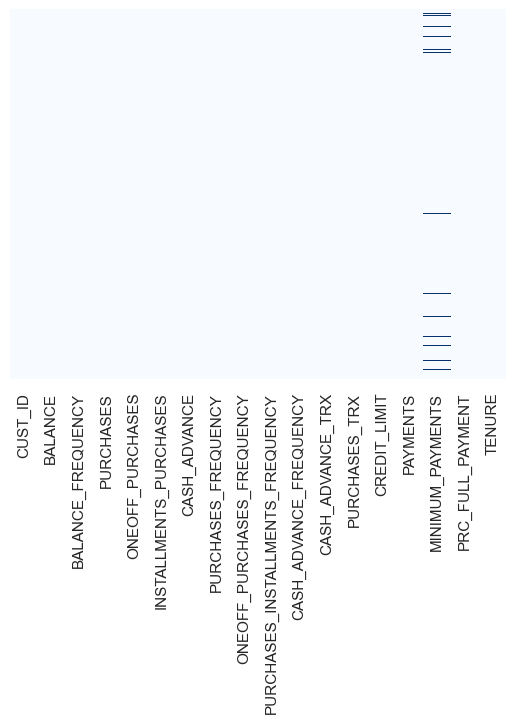

In [7]:
# df.isna().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues");

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* Presencia de datos faltantes en la columna MINIMUN_PAYMENTS y en CREDIT_LIMIT

In [9]:
# obtener las filas donde los datos son nulos
df.loc[(df["MINIMUM_PAYMENTS"].isnull() == True), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
import numpy as np
from sklearn.impute import KNNImputer

# delete unnecesary column
del df['CUST_ID']

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=3)

# impute missing values
df_imputed_matrix = imputer.fit_transform(df)

# Combine the input and output elements back into a dataframe
df_imputed = pd.concat([pd.DataFrame(df_imputed_matrix, columns=df.columns)], axis=1)
df_imputed.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Busqueda de datos duplicados

In [12]:
df.duplicated().sum()

0

* No hay presencia de datos duplicados

#### ANALISIS UNIVARIADO

In [13]:
# define numerical and categorical features
num_features = list(df.select_dtypes(exclude=[object]).columns)
cat_features = list(df.select_dtypes(include=[object]).columns)

print(f"There are {len(num_features)} numerical features: {num_features}")
print(f"There are {len(cat_features)} categorical features: {cat_features}")

There are 17 numerical features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
There are 0 categorical features: []


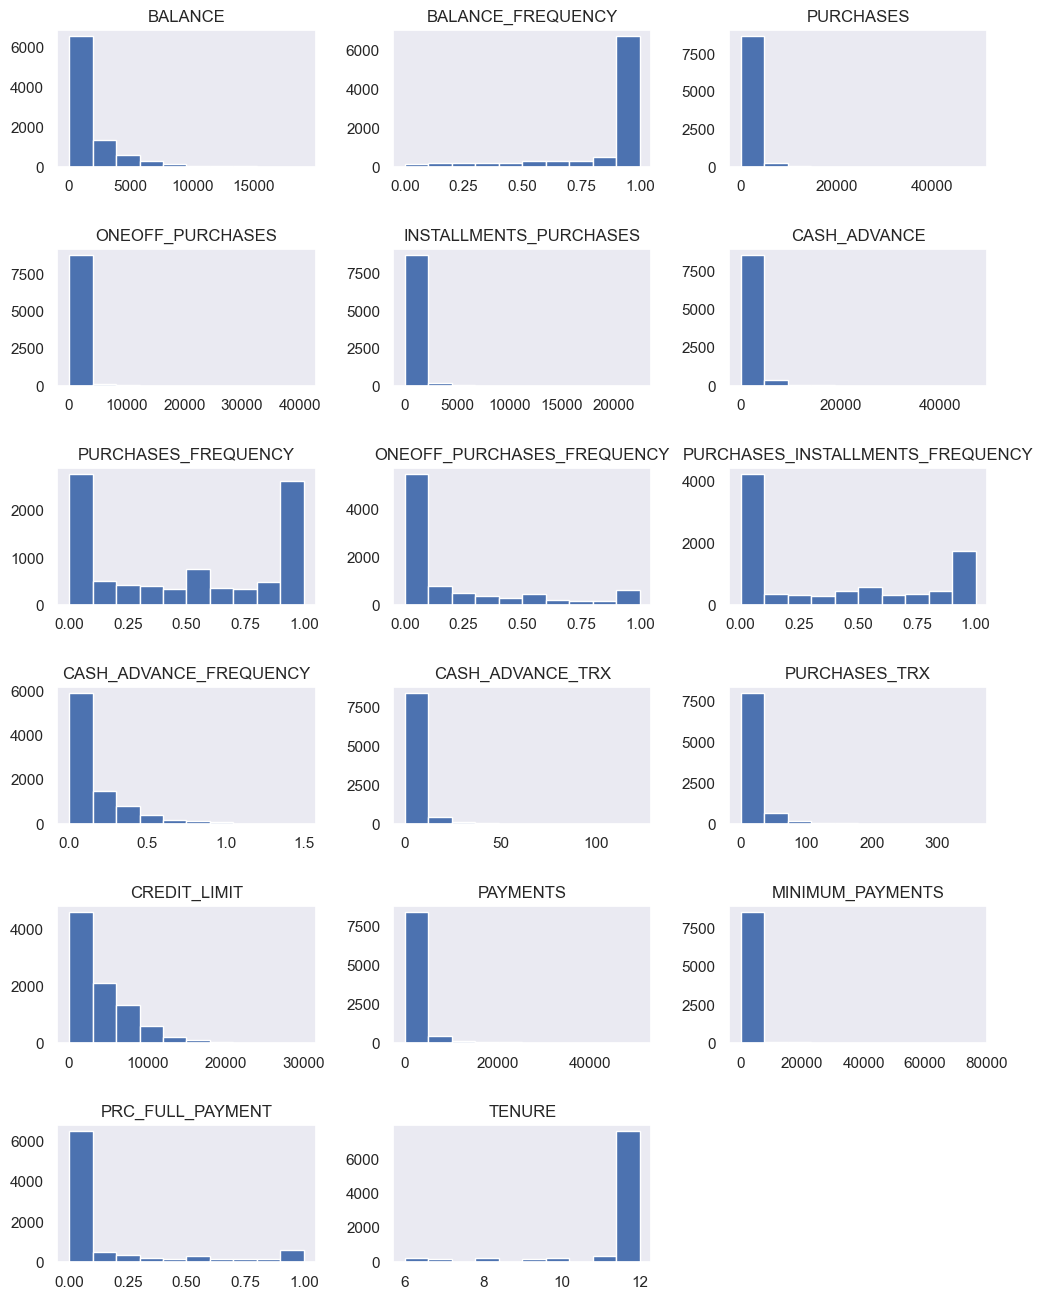

In [14]:
# plot histograms for all numeric columns
df.hist(bins=10, figsize=(12,16), grid=False,layout=(len(df.columns)//3+1, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)

* Para "PURCHASES_FREQUENCY" se observa que hay gran cantidad que usa la tarjeta bastante para realizar las compras y otro grupo que no hace uso de ella para sus compras.

In [15]:
# cantidad de valores unicos por columna
for colname in list(df.columns):
    print(colname)
    print(f"{len(df[colname].unique())}, \n")

BALANCE
8871, 

BALANCE_FREQUENCY
43, 

PURCHASES
6203, 

ONEOFF_PURCHASES
4014, 

INSTALLMENTS_PURCHASES
4452, 

CASH_ADVANCE
4323, 

PURCHASES_FREQUENCY
47, 

ONEOFF_PURCHASES_FREQUENCY
47, 

PURCHASES_INSTALLMENTS_FREQUENCY
47, 

CASH_ADVANCE_FREQUENCY
54, 

CASH_ADVANCE_TRX
65, 

PURCHASES_TRX
173, 

CREDIT_LIMIT
206, 

PAYMENTS
8711, 

MINIMUM_PAYMENTS
8637, 

PRC_FULL_PAYMENT
47, 

TENURE
7, 



<Figure size 640x480 with 0 Axes>

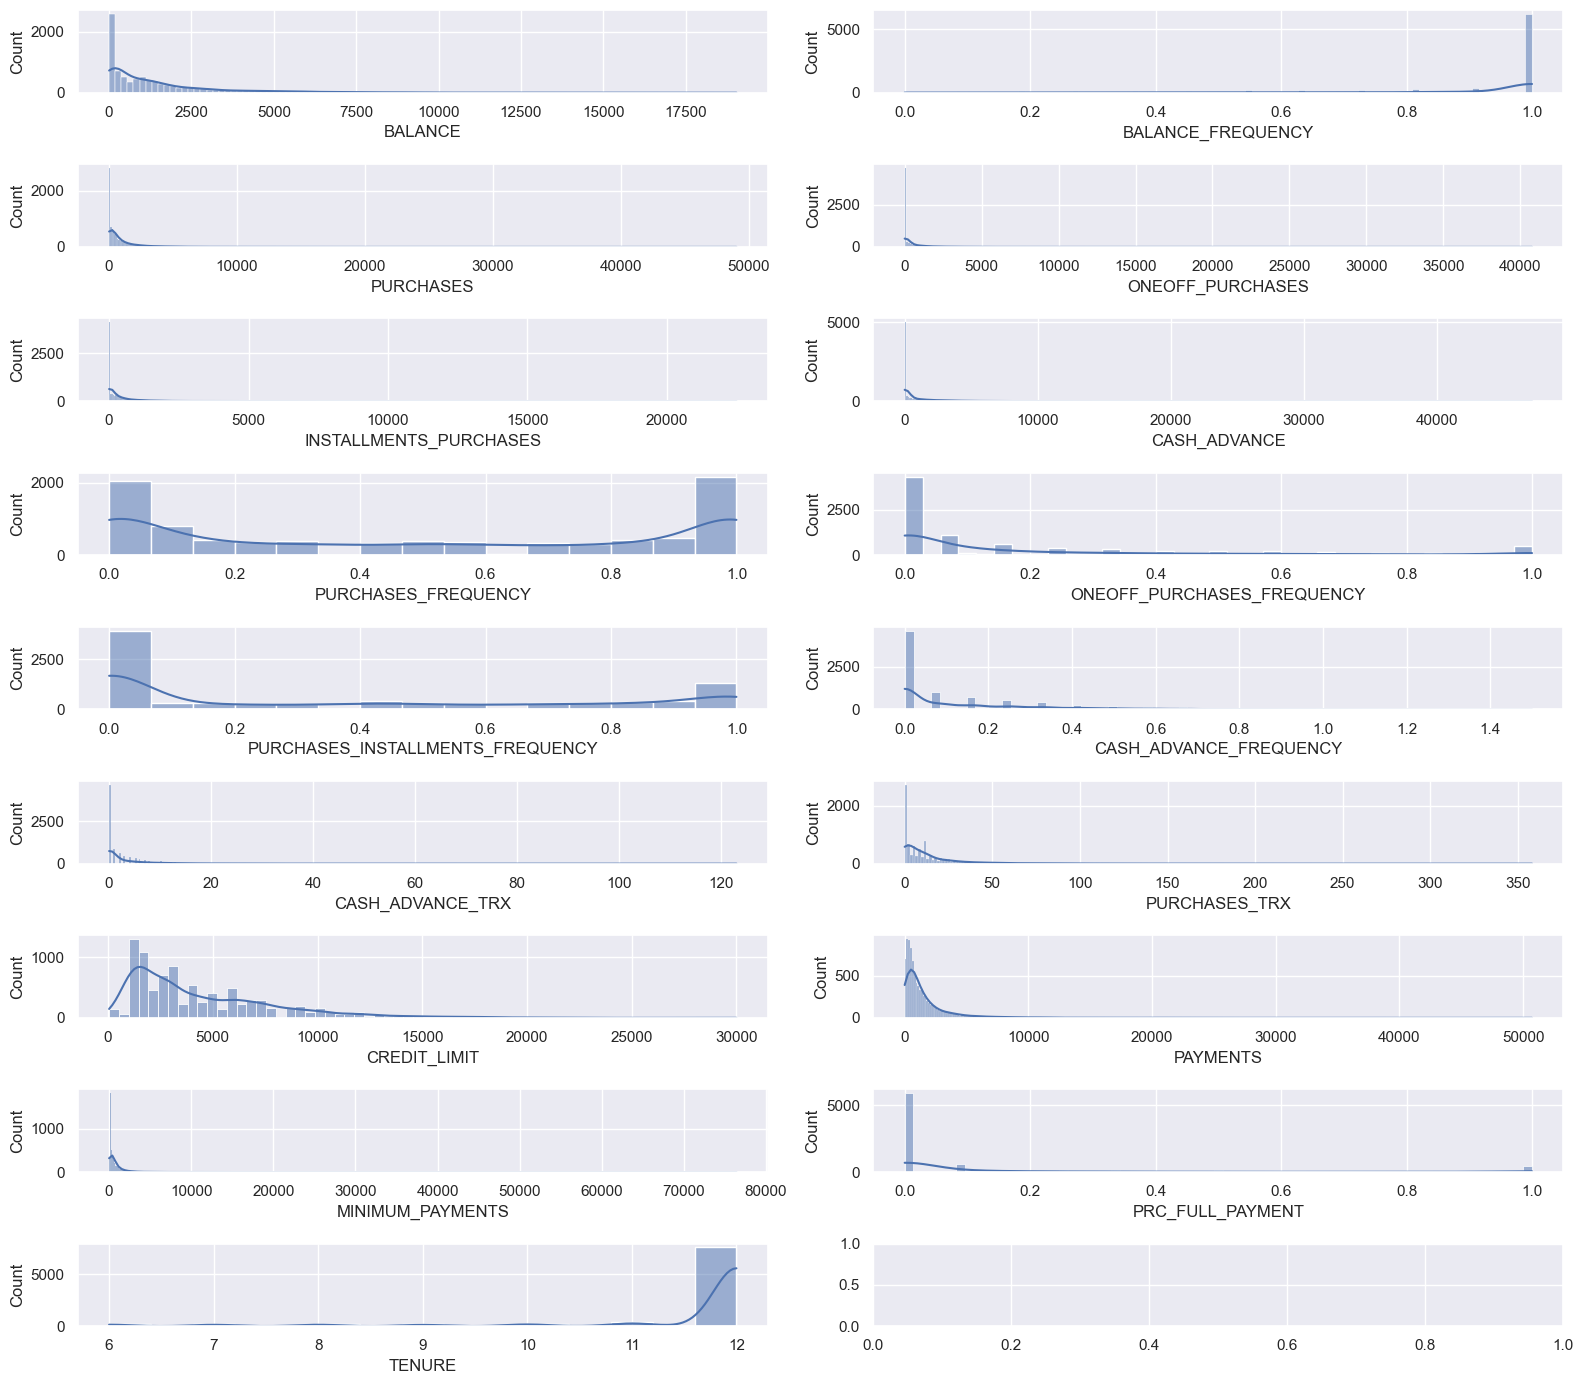

In [16]:
n_cols = 2
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.8)
fig, axs = plt.subplots(nrows=len(df.columns)//n_cols+1, ncols=n_cols, figsize=(16, 14))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axs[i//n_cols, i%n_cols])
    #axs[i//n_cols, i%n_cols].set_title(col)

plt.tight_layout()

* Observamos que hay varias columnas que se encuentra con los datos concentrados en un dato en particular y en minima o casi nula concentracion para otros valores.

In [17]:
# Función para visualizar la distribucion de los datos y estadisticos
def show_distribution(var_data, colname):
    #from matplotlib import pyplot as plt

    # Obtener estadísticas
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    std_val = var_data.std()
    mod_val = var_data.mode()[0]

    """
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nStd:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            std_val,
                                                                                            max_val
                                                                                            ))
                                                                                            """

    # Crear un figura para 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (8,5))

    # Plotear el histograma 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotear el boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Agregar título 
    fig.suptitle(f'{colname} Distribution')
 
    # Mostrar la figura
    fig.show()

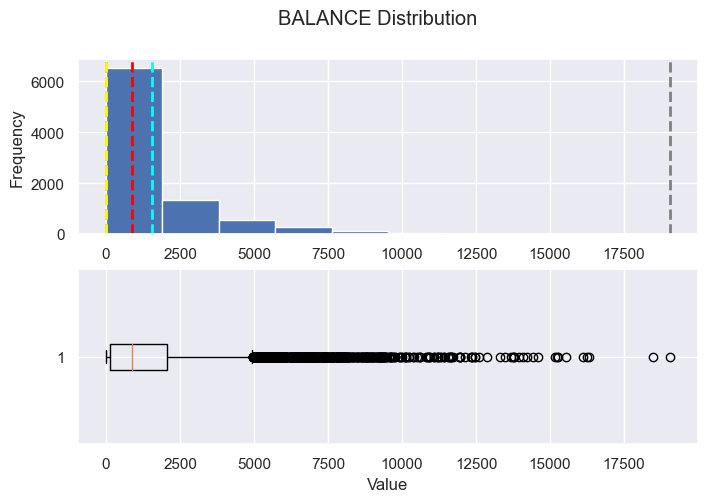

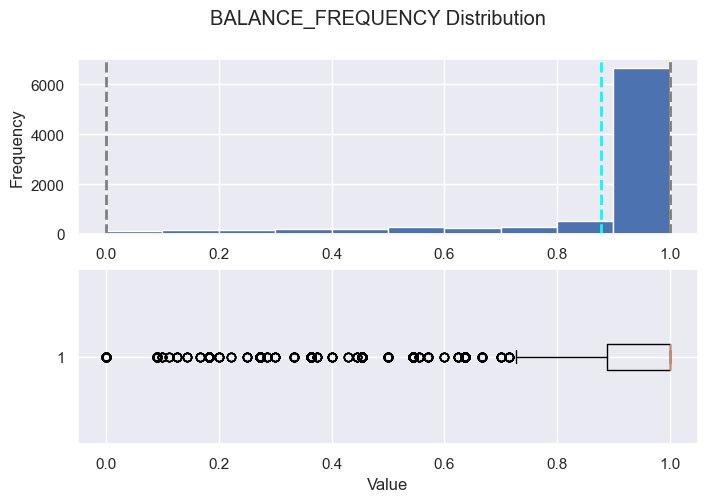

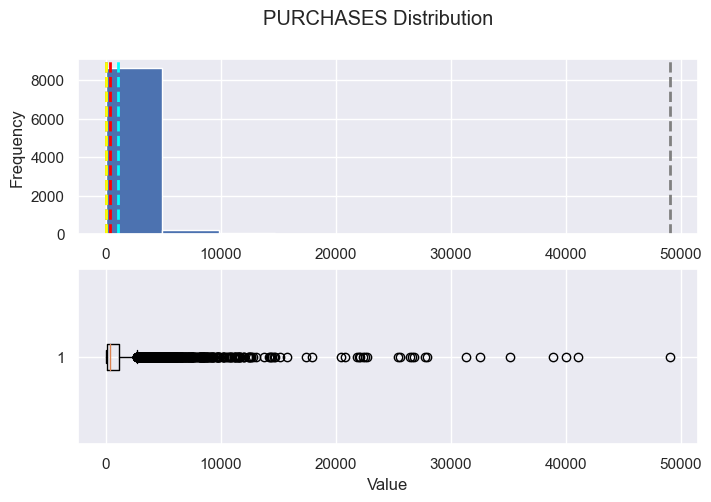

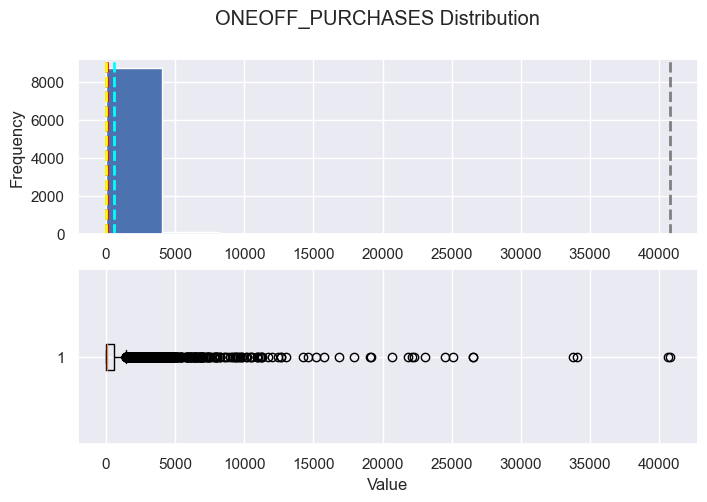

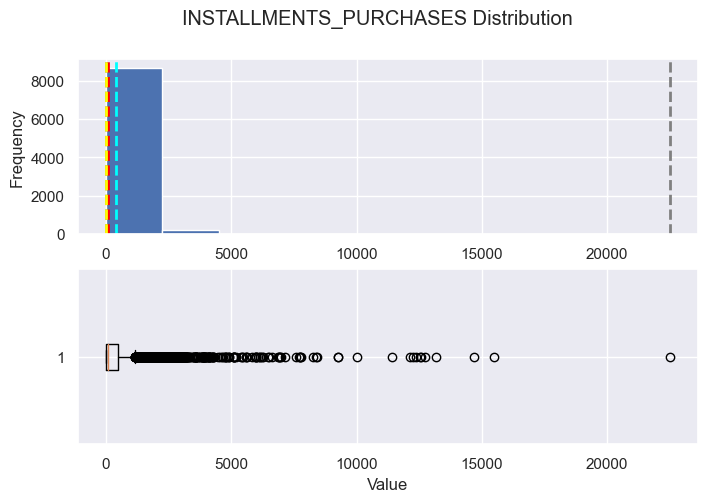

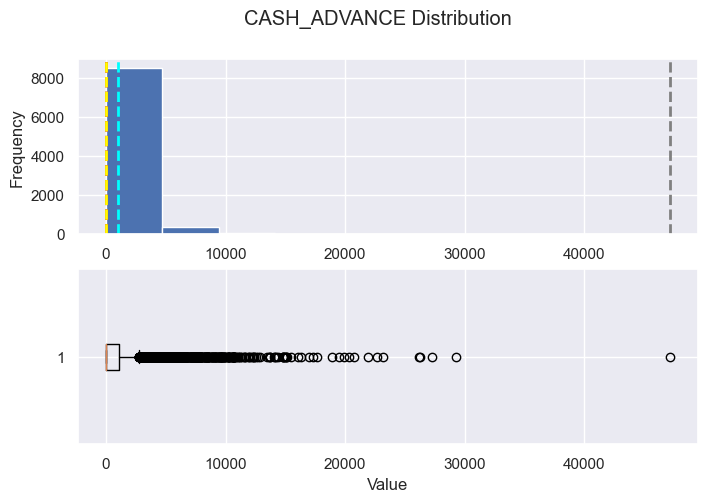

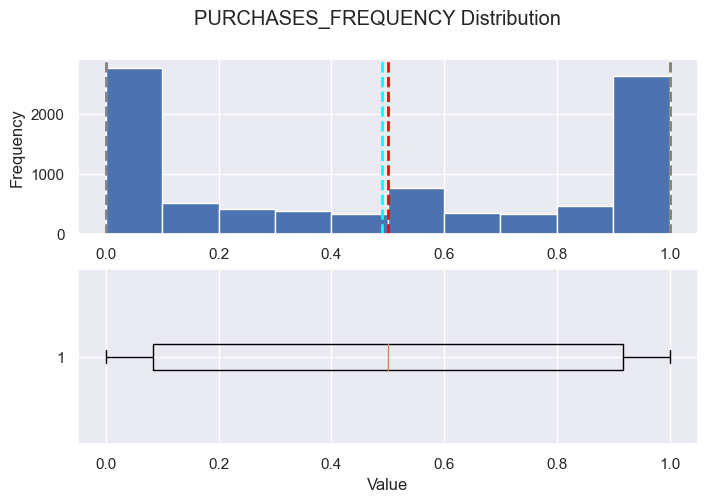

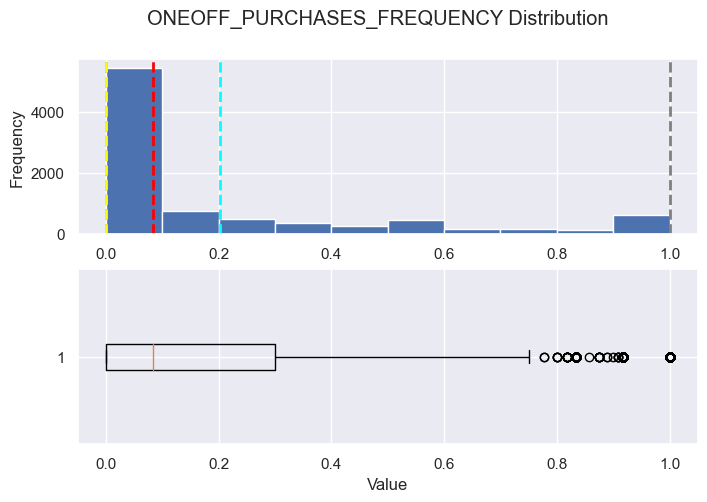

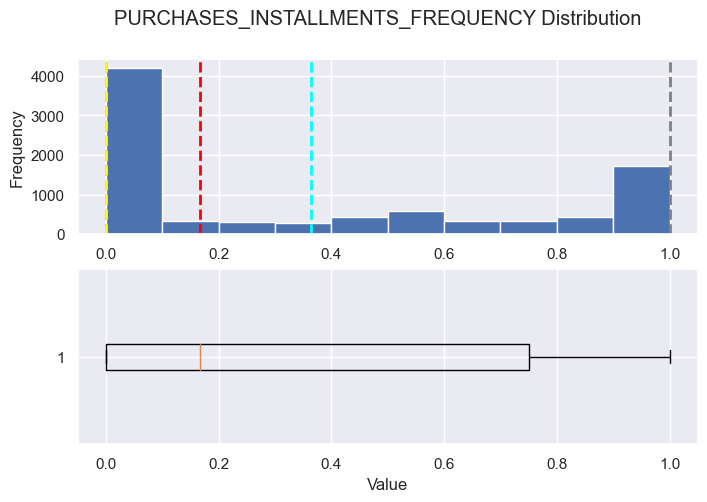

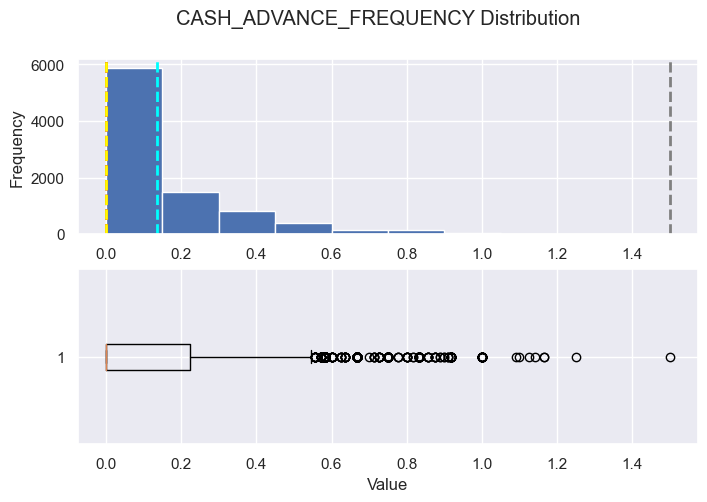

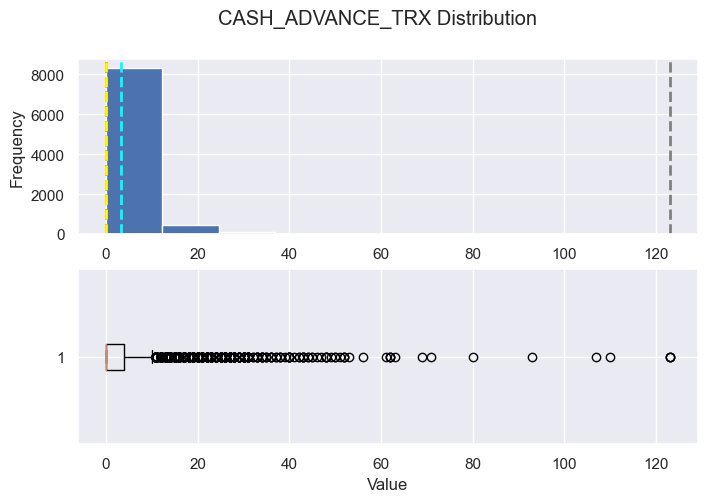

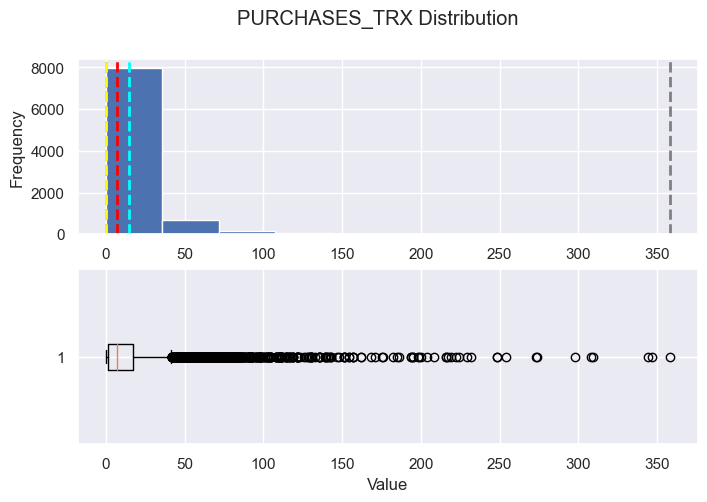

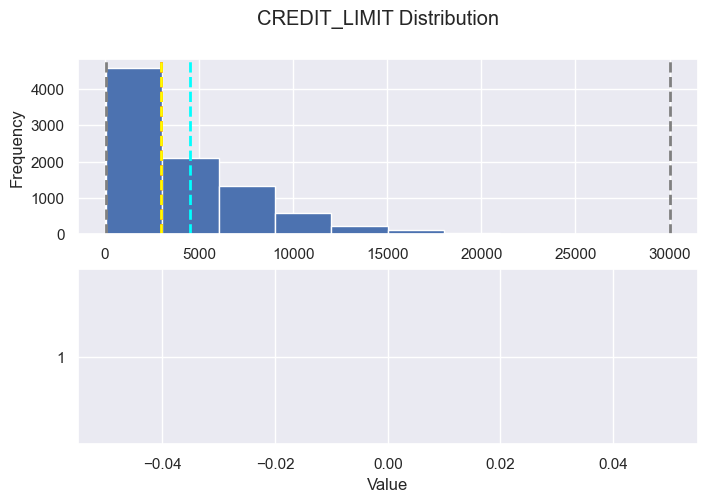

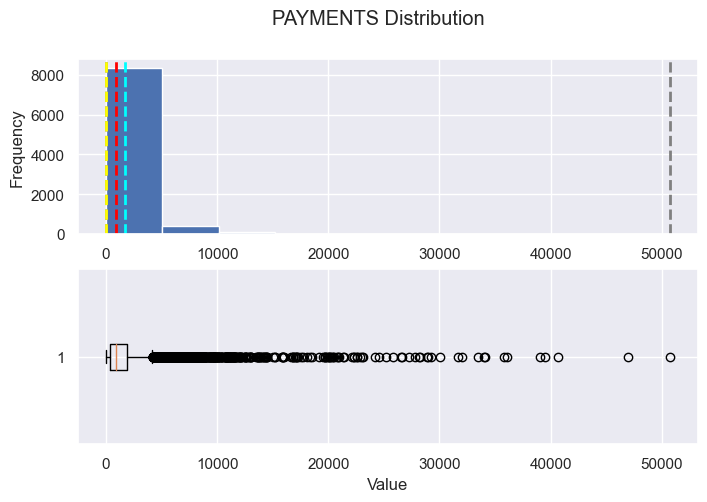

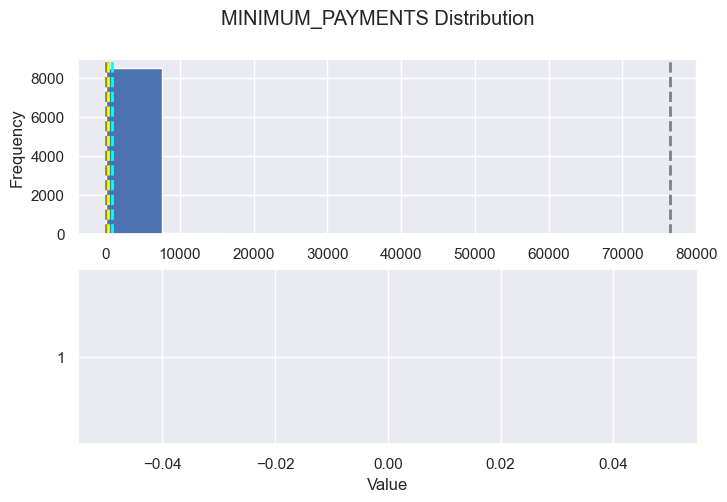

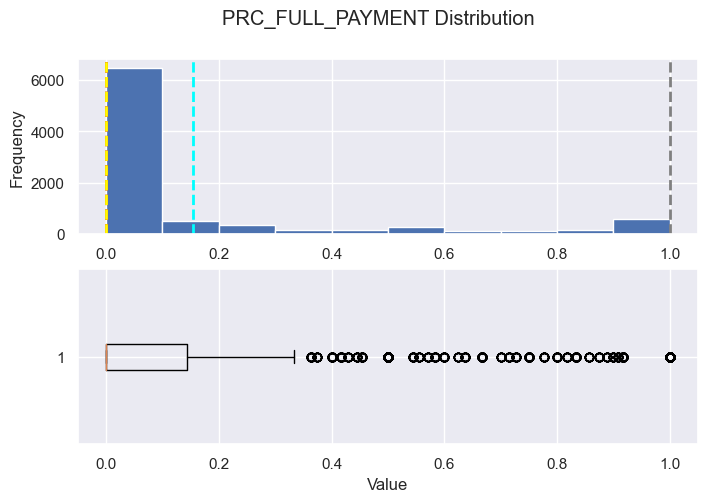

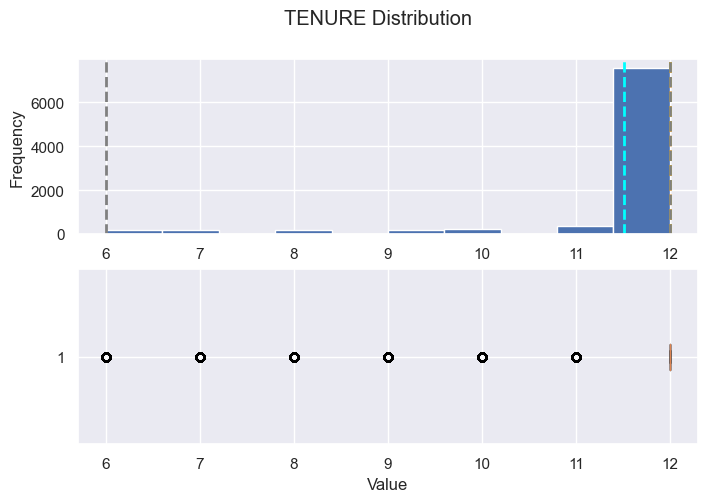

In [18]:
import warnings
warnings.filterwarnings("ignore")

num_features = list(df.select_dtypes(exclude=[object]).columns)

for col in num_features:
    show_distribution(df[f'{col}'],col)

In [19]:
# # Eliminando campos que no aportaran informacion al modelo
# df.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber"], axis=1, inplace=True)
# df.shape

In [20]:
# Reemplazar las columnas "Attrition" y "Overtime"  por valores enteros
# df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
# df["OverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
# # 0:No 1: Yes

### Analisis bivariado

In [21]:
df["TENURE"].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

<Axes: xlabel='TENURE'>

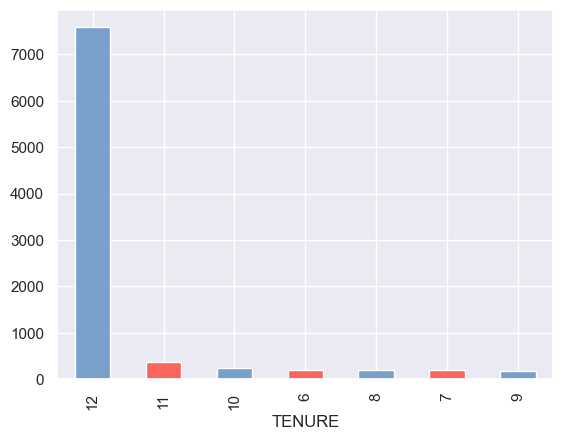

In [22]:
df["TENURE"].value_counts().plot(kind="bar", color=["#799fcb","#f9665e"])

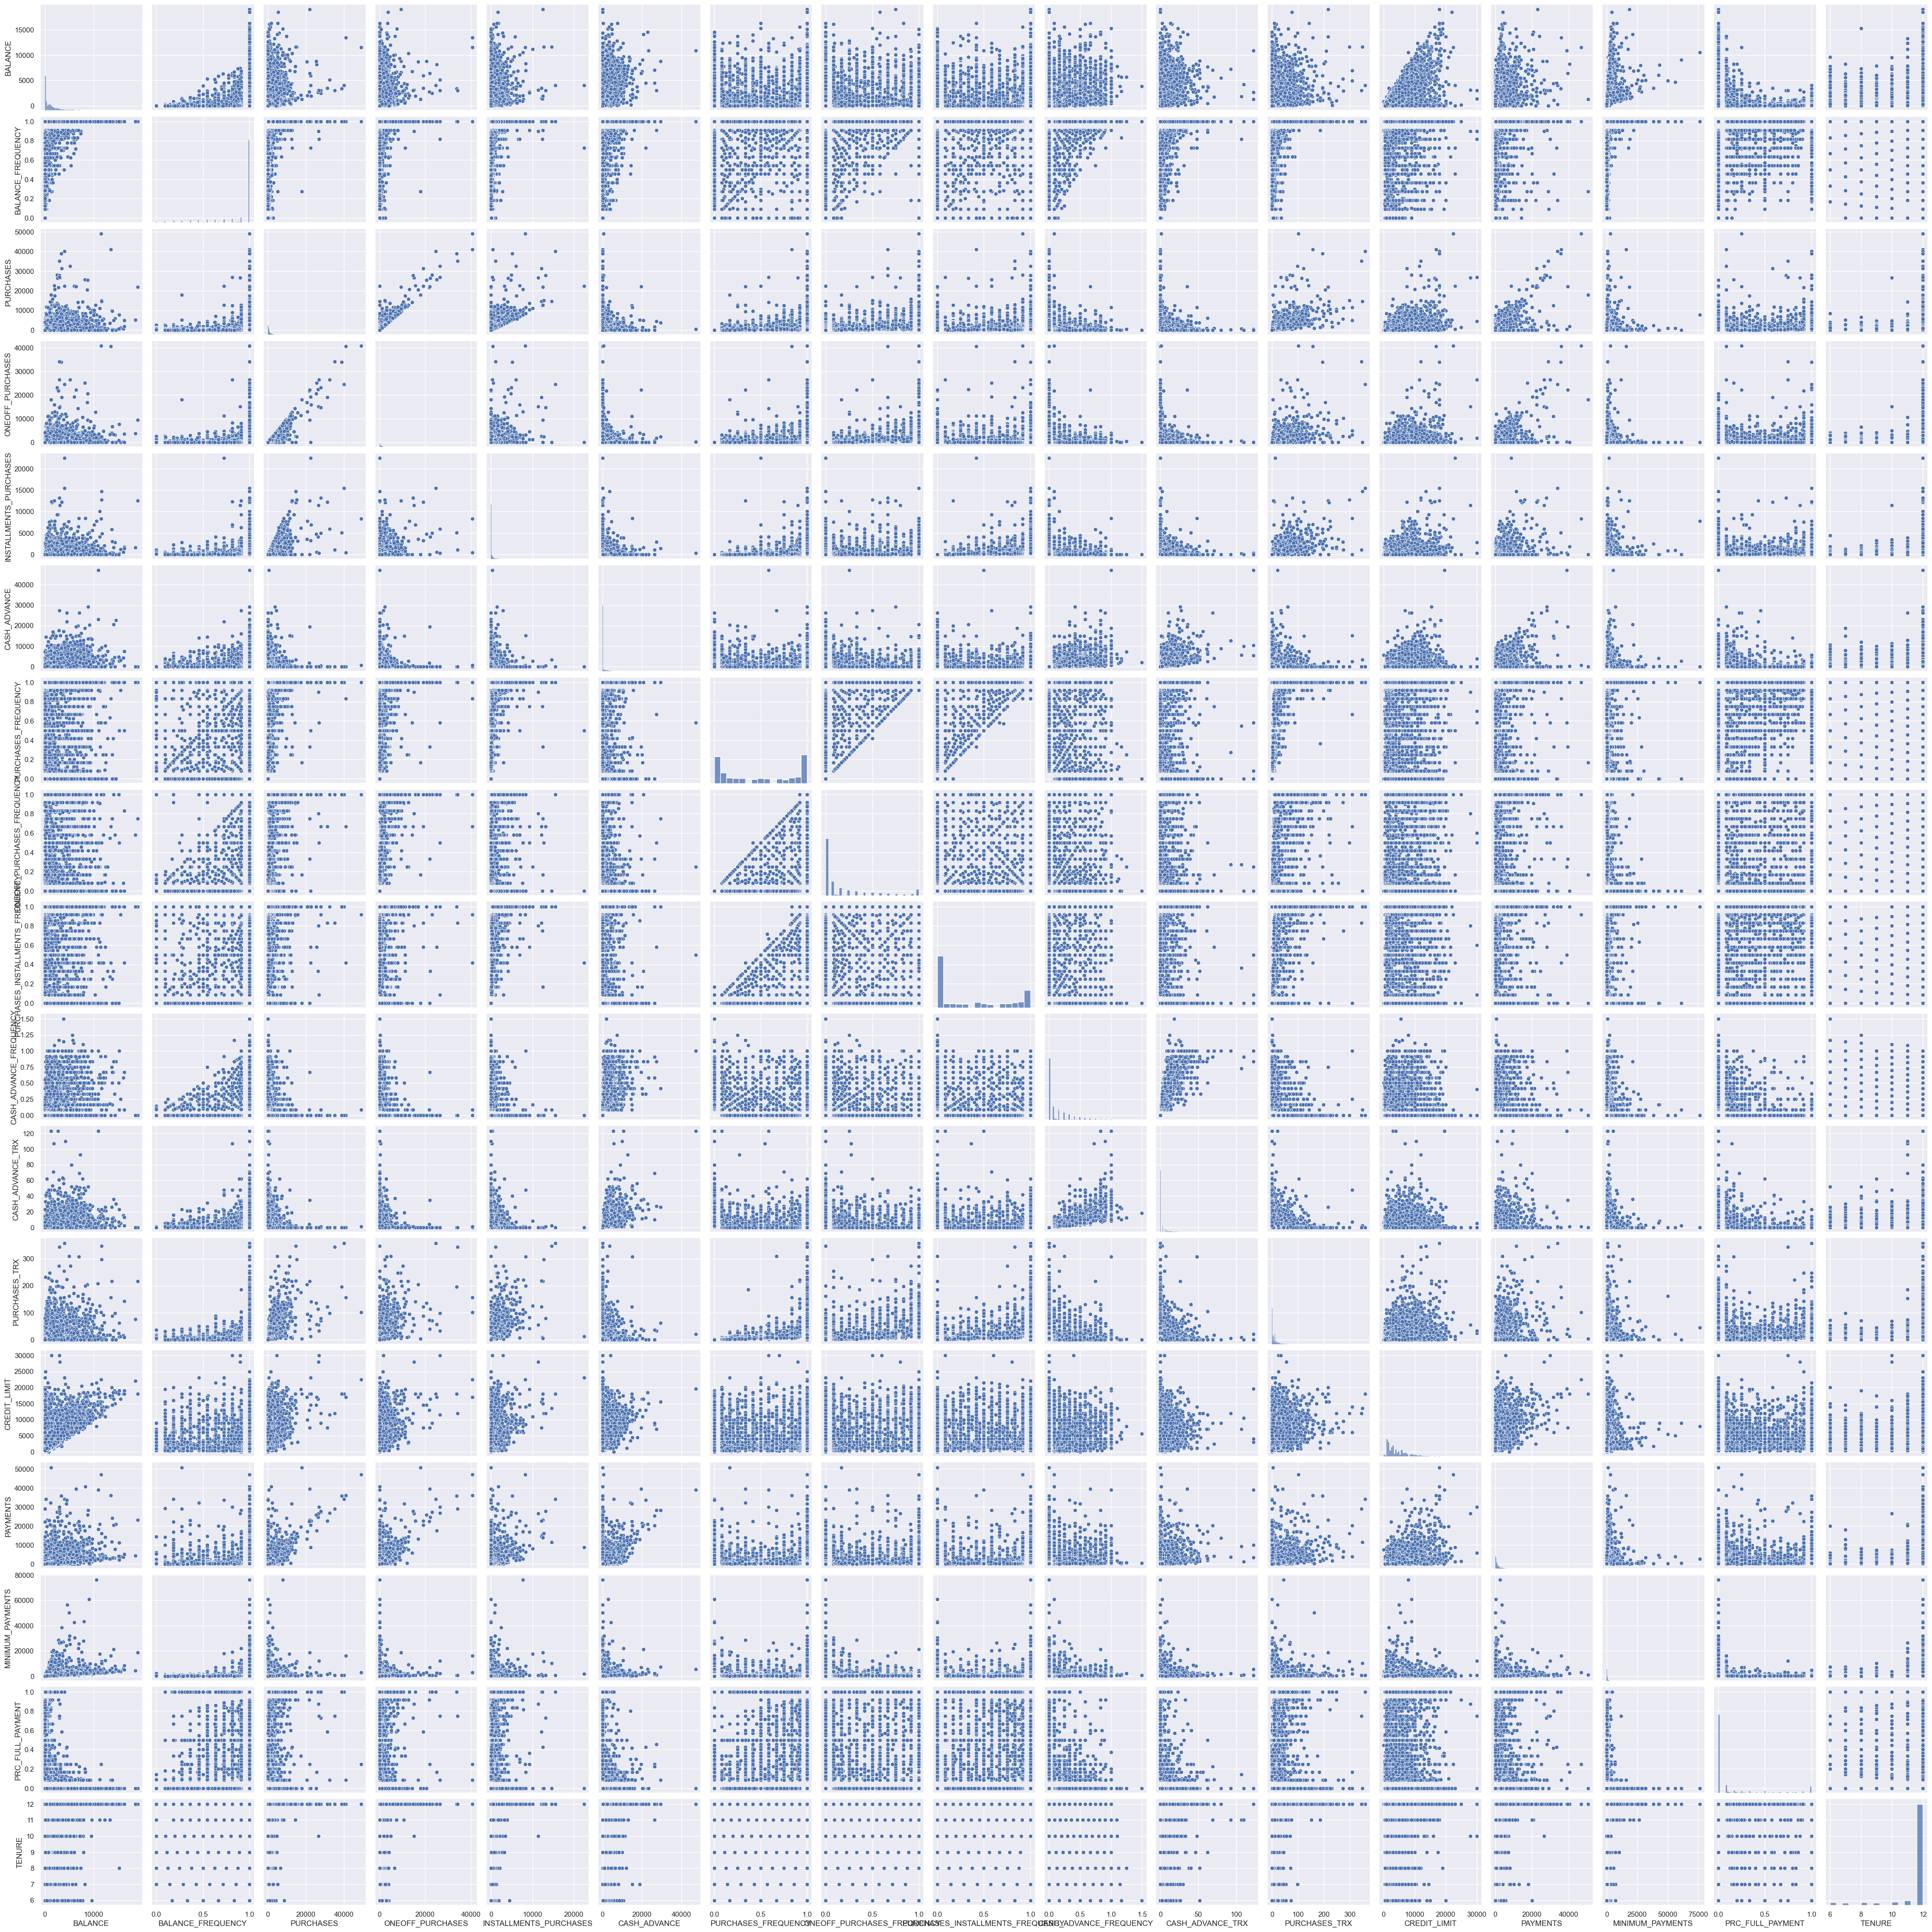

In [53]:
sns.pairplot(df_imputed)

Text(0.5, 1.0, 'Matriz de Correlación')

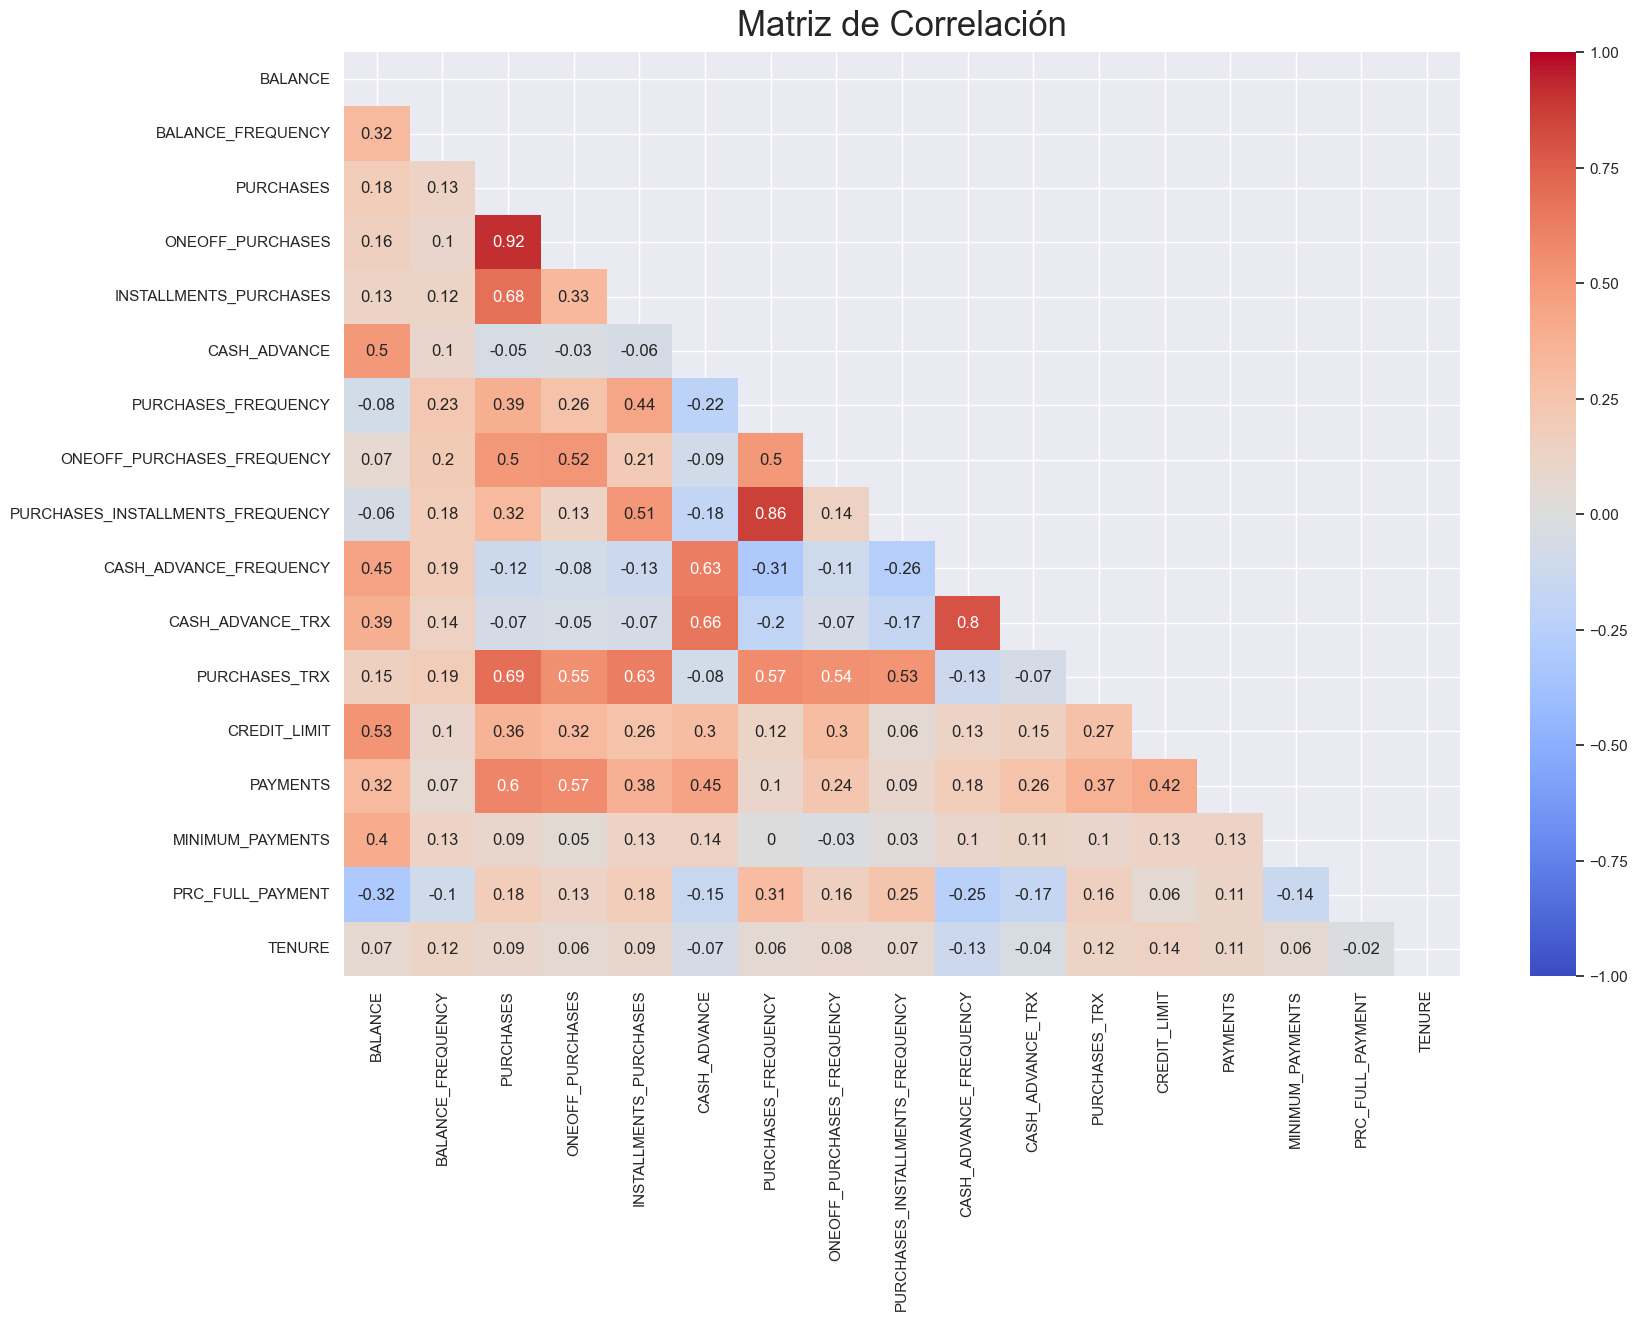

In [23]:
plt.figure(figsize=(18, 12))
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12)

* Hay una muy alta correlacion positiva entre la variable "PURCHASE" y "ONEOFF_PURCHASE" de 0.92, quien compra mucho, compra mucho de forma directa sin aplazar.
* Hay una correlacion positiva entre la variable "PURCHASE" y "INSTALLMENTS_PURCHASE".
* 

# PRE PROCESAMIENTO

In [ ]:
# eliminacion de datos outliers


In [26]:
# Escalamiento de los datos
scaler = StandardScaler()
datos = scaler.fit_transform(df_imputed)
datos

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3039713 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09272875,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09653771,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32825028,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33958901,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32575373,
        -0.52555097, -4.12276757]])

## MODELAMIENTO

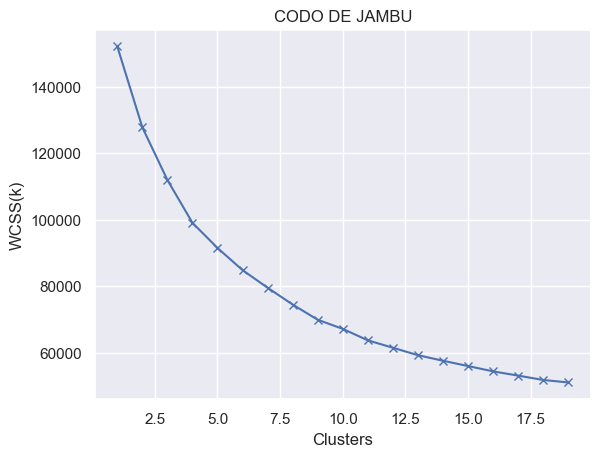

In [29]:
# CODO DE JAMBU
scores_l = []
range_values = range(1,20) # de 1 a 20 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(datos)
    scores_l.append(kmeans.inertia_) # WCSS

plt.plot(range_values, scores_l, 'bx-')
plt.title("CODO DE JAMBU")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [61]:
# Modelando
kmeans = KMeans(8) #8
kmeans.fit(datos)
# Obtener los labels
labels = kmeans.labels_


In [62]:
# Obtener los centros de los clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df_imputed.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  1.670578          0.390676  -0.221613        -0.157996   
1 -0.358153          0.331954  -0.029774        -0.240651   
2 -0.120041          0.403075   0.564218         0.683980   
3 -0.334235         -0.345364  -0.287007        -0.212744   
4 -0.700928         -2.138065  -0.309875        -0.234351   
5  0.008473          0.404717  -0.354518        -0.239232   
6  1.865907          0.332878  12.596844        13.111182   
7  1.086172          0.472614   2.606207         1.903728   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.233802     1.997826           -0.482408   
1               0.371521    -0.362572            0.996574   
2               0.077292    -0.331833            0.997864   
3              -0.287412     0.068171           -0.202320   
4              -0.302036    -0.322516           -0.553674   
5              -0.398634    -0.099388           -0.842048   
6               5.696389    -0.004178            1.033322   
7               2.664995    -0.126617            1.163761   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.214009                        -0.422370   
1                  -0.380825                         1.207885   
2                   1.913142                         0.214359   
3                  -0.283605                        -0.226363   
4                  -0.440210                        -0.439588   
5                  -0.384472                        -0.751011   
6                   2.170634                         0.866221   
7                   1.584646                         1.260021   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.910244         1.916907     -0.271681     1.014386   
1              -0.472004        -0.359611      0.195098    -0.259392   
2              -0.414858        -0.331754      0.659391     0.463958   
3               0.308382         0.000348     -0.387485    -0.563870   
4              -0.521496        -0.376524     -0.418513    -0.174937   
5               0.093813        -0.035350     -0.478168    -0.305662   
6              -0.476183        -0.214854      4.566558     3.174193   
7              -0.269145        -0.128824      3.218719     1.337690   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.813195         0.551496        -0.391364  0.071452  
1 -0.213218        -0.024722         0.313970  0.255466  
2  0.162539        -0.152064         0.457850  0.274101  
3 -0.391355        -0.213730         0.013610 -3.198580  
4 -0.202031        -0.296427         0.281800  0.199250  
5 -0.251945        -0.001347        -0.454917  0.274532  
6  8.991136         1.059517         1.236317  0.295702  
7  1.532138         0.602481         0.259664  0.335772

In [63]:
# Invirtiendo los valores
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[df_imputed.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  5041.641553          0.969818    529.725210       330.197072   
1   819.009326          0.955908    939.593123       193.006326   
2  1314.619033          0.972755   2208.664884      1727.703485   
3   868.793568          0.795457    390.010464       239.326032   
4   105.552739          0.370783    341.151561       203.462143   
5  1582.111204          0.973145    245.770773       195.361489   
6  5448.201718          0.956126  27916.555652     22354.314348   
7  3825.250962          0.989229   6571.407182      3752.236061   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             199.643541  5168.404620            0.296737   
1             747.029673   218.540823            0.890324   
2             480.961399   283.002094            0.890842   
3             151.164432  1121.829931            0.409150   
4             137.939882   302.539864            0.268134   
5              50.588135   770.450096            0.152396   
6            5562.241304   970.110470            0.905072   
7            2820.989303   713.349682            0.957424   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.138615                         0.196577   
1                   0.088850                         0.844482   
2                   0.773185                         0.449629   
3                   0.117853                         0.274475   
4                   0.071134                         0.189734   
5                   0.087762                         0.065966   
6                   0.850000                         0.708696   
7                   0.675188                         0.865202   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.517403        16.330306      7.956867   8185.022186   
1               0.040691         0.794745     19.559246   3550.381855   
2               0.052127         0.984848     31.099822   6182.288122   
3               0.196855         3.251200      5.078400   2442.538667   
4               0.030788         0.679325      4.307173   3857.670417   
5               0.153917         3.007589      2.824359   3382.026262   
6               0.039855         1.782609    128.217391  16043.478261   
7               0.081286         2.369697     94.715152   9361.363636   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   4087.263771      2151.119772         0.039248  11.612940  
1   1115.898345       796.156727         0.245545  11.859197  
2   2203.679346       496.716939         0.287628  11.884135  
3    600.208404       351.709575         0.157695   7.236800  
4   1148.284840       157.250962         0.236136  11.783966  
5   1003.788250       851.122705         0.020659  11.884713  
6  27761.600386      3345.718254         0.515316  11.913043  
7   6168.534001      2271.009154         0.229662  11.966667

## VALIDACION DE LOS CLUSTERS

In [49]:
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [64]:
# Cálculo de métricas para KMEANS

# silhouette_score -> entre más alto mejor
# davies_bouldin_score -> entre más bajo mejor
silueta_km = silhouette_score(datos, kmeans.labels_)
davies_bouldin_km = davies_bouldin_score(datos, kmeans.labels_)
print(f"silueta_km -> {silueta_km},  davies_bouldin_km -> {davies_bouldin_km}")

silueta_km -> 0.22143180506585805,  davies_bouldin_km -> 1.3637903913135985


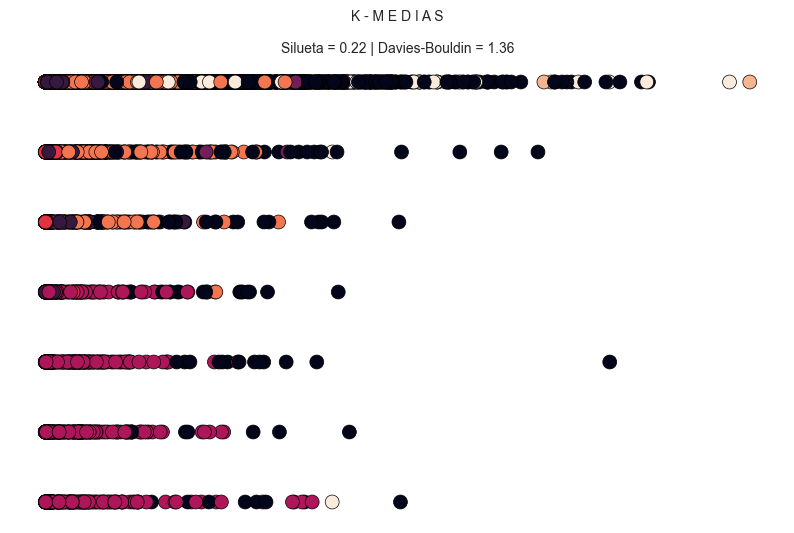

In [81]:
indx_col_x = 0 
indx_col_y = 16

fig = plt.figure(figsize=(10, 6)) # Initialize the figure object with a size of 10x6 inches
ax = fig.add_subplot(1, 1, 1)
ax.scatter(datos[kmeans.labels_>=0][:, indx_col_x], datos[kmeans.labels_>=0][:, indx_col_y], 
           c=kmeans.labels_[kmeans.labels_>=0], s=100, 
           linewidth=0.5, edgecolors="black")
ax.set_title("K - M E D I A S\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_km, davies_bouldin_km), fontsize=10)

# Plot the centers of clustering as points on the scatter plot
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='g')
ax.axis("off")
plt.show()


## Análisis de componentes principales

In [83]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(datos)
principal_comp

array([[-1.68337702, -1.07298006],
       [-1.13494552,  2.50722728],
       [ 0.96955595, -0.3833018 ],
       ...,
       [-0.92858567, -1.808903  ],
       [-2.33760537, -0.65510424],
       [-0.55770635, -0.40189824]])

In [84]:
# dandole formato de dataframe a las 2 componentes
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.683377 -1.072980
1 -1.134946  2.507227
2  0.969556 -0.383302
3 -0.884646  0.013194
4 -1.599795 -0.684171

In [85]:
# Concatenando las etiquetas de los lcusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.683377 -1.072980        5
1 -1.134946  2.507227        0
2  0.969556 -0.383302        2
3 -0.884646  0.013194        5
4 -1.599795 -0.684171        5

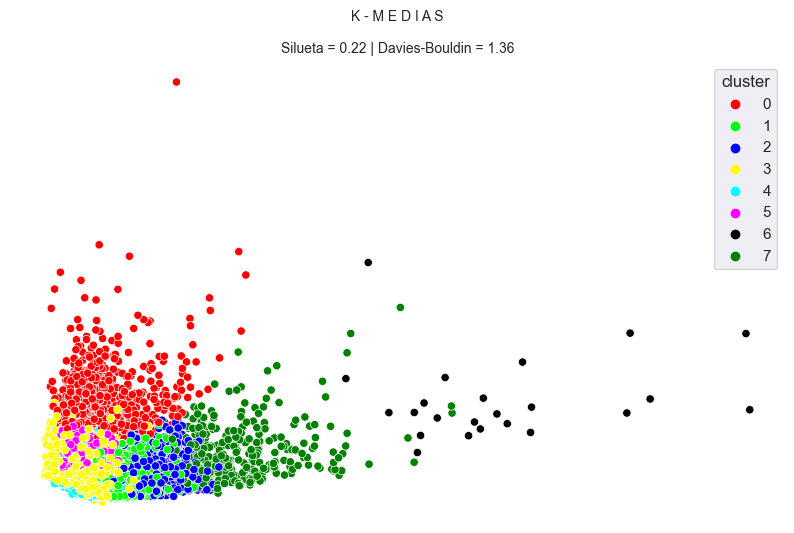

In [100]:

fig = plt.figure(figsize=(10, 6)) # Initialize the figure object with a size of 10x6 inches
ax = sns.scatterplot(x='pca1', y = 'pca2', hue='cluster', data=pca_df,
                     palette=['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#000000', '#008000'],
                     linewidth=0.5,
                     edgecolors="white")

ax.set_title("K - M E D I A S\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_km, davies_bouldin_km), fontsize=10)

# Plot the centers of clustering as points on the scatter plot
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='g')
ax.axis("off")
plt.show()

## Reducción de la dimensionalidad mediante autoencoders

![Alt text](image-3.png)

![Alt text](image-4.png)

In [101]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [105]:
encoding_dim = 7 # reduccion de componentes que queremos
input_df = Input(shape=(17, )) # 17 caracteristicas y observaciones variables
# -------- COMPRESION --------
# glorot normal: es un inicializador: tomar muestras aleatorias de una distribucion normal
x = Dense(encoding_dim, activation='relu')(input_df) # capa para reducir la dimension a 7
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x) # 
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x) # 
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x) # 

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# -------- DESCOMPRESION --------
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded) # 
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x) # 

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# -------- AUTOENCODER --------
autoencoder = Model(input_df, decoded) # COMPRIMIR Y DESCOMPRIMIR
# -- para obtener solamente con los datos comprimidos crear un 2do modelo
encoder = Model(input_df, encoded)

# compilar nuestro autoencoder
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
df_imputed.shape

(8950, 17)

In [106]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [ ]:
autoencoder.fit(df_imputed,df_imputed, batch_size=128, epochs=25, verbose=1)

In [ ]:
# salvar los pesos encontrados
autoencoder.save_weights('autoencoder.h5')

In [150]:
pred = encoder.predict(datos)

 16/280 [>.............................] - ETA: 1s

280/280 [==============================] - 2s 7ms/step


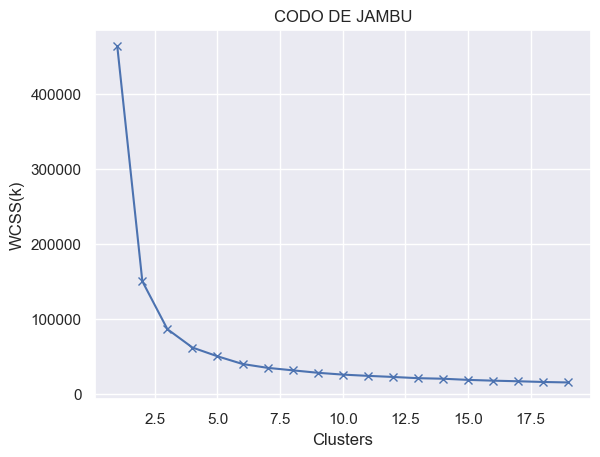

In [151]:
# CODO DE JAMBU
scores_2 = []
range_values2 = range(1,20) # de 1 a 20 clusters

for i in range_values2:
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(pred)
    scores_2.append(kmeans2.inertia_) # WCSS

plt.plot(range_values2, scores_2, 'bx-')
plt.title("CODO DE JAMBU")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [152]:
kmeans2 = KMeans(4)
kmeans2.fit(pred)
labels2 = kmeans2.labels_
y_kmeans2 = kmeans2.fit_predict(pred)

In [153]:
# Obtener los centros de los clusters
df_cluster_dr = pd.concat([df_imputed, pd.DataFrame({'cluster':labels2})], axis=1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000    12.0        1  
1  4103.032597       1072.340217          0.222222    12.0        2  
2   622.066742        627.284787          0.000000    12.0        1  
3     0.000000        448.208854          0.000000    12.0        1  
4   678.334763        244.791237          0.000000    12.0        1

In [154]:
silueta_km2 = silhouette_score(datos, kmeans2.labels_)
davies_bouldin_km2 = davies_bouldin_score(datos, kmeans2.labels_)
print(f"silueta_km -> {silueta_km2},  davies_bouldin_km -> {davies_bouldin_km2}")

silueta_km -> 0.10980726989477367,  davies_bouldin_km -> 3.7960417580094115


In [155]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -5.582374  0.766588
1 -0.399223 -4.744743
2 -5.265750  0.572432
3 -6.378388  1.819545
4 -5.541555  0.838362

In [156]:
# Concatenando las etiquetas de los lcusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels2})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -5.582374  0.766588        1
1 -0.399223 -4.744743        2
2 -5.265750  0.572432        1
3 -6.378388  1.819545        1
4 -5.541555  0.838362        1

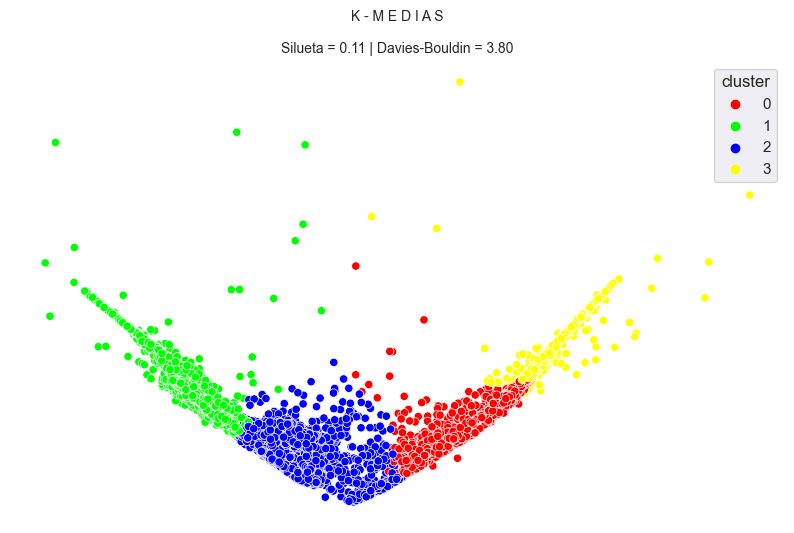

In [157]:

fig = plt.figure(figsize=(10, 6)) # Initialize the figure object with a size of 10x6 inches
ax = sns.scatterplot(x='pca1', y = 'pca2', hue='cluster', data=pca_df,
                     palette=['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#000000', '#008000'],
                     linewidth=0.5,
                     edgecolors="white")

ax.set_title("K - M E D I A S\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_km2, davies_bouldin_km2), fontsize=10)

# Plot the centers of clustering as points on the scatter plot
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='g')
ax.axis("off")
plt.show()